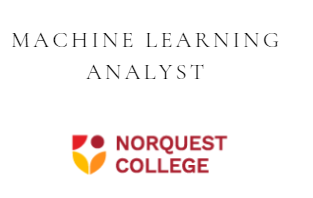

PROBLEM STATEMENT: Overall Demand Prediction Based on Seasonality, Special Occasions, and Family Size
The objective is to forecast the overall demand for food hampers over future periods by considering factors like seasonal fluctuations,
special religious occasions, and family size. Accurate predictions will enable better planning for inventory, staffing, and resource allocation,
particularly during peak periods.

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Loading the dataset

In [ ]:
# Load the dataset with a specified encoding
client_data= pd.read_csv('Clients_Data_Dimension.csv', encoding='latin1')

<ipython-input-2-6884f0ab2c75>:2: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  client_data= pd.read_csv('Clients_Data_Dimension.csv', encoding='latin1')


Displaying first 5 rows of client data

In [ ]:
client_data.head()

,ï»¿address,address_complement,address_text,age,bio,birthdates,client_status_more_info,communication_barrier,contact_frequency,date_reopened,...,status,status_update,urgent_goal,worker,zz_address_txt,Creation Date,Modified Date,Slug,Creator,unique id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Active,NaN,no,1659409273747x473742471276596300,NaN,"Sep 23, 2022 19:07","Aug 22, 2024 11:56",pod-001,1658438468381x917903915060866600,1663970867191x215057012520910850
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Active,NaN,no,NaN,NaN,"Sep 23, 2022 19:09","Aug 22, 2024 11:50",2,1658438468381x917903915060866600,1663970977536x320239406776320000
2,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Active,NaN,no,1667329109038x317932150591159600,NaN,"Nov 1, 2022 15:27","Aug 22, 2024 12:36",pod-023,1658438468381x917903915060866600,1667327243288x887165737992192000
3,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Active,NaN,no,NaN,NaN,"Nov 7, 2022 12:12","Aug 22, 2024 11:58",pod-024,1667329109038x317932150591159600,1667833948363x769349711194751000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oct 4, 2023 17:20",...,Active,1696450812192x367068913511604100,no,NaN,NaN,"Nov 7, 2022 12:17","Aug 22, 2024 12:04",pod-025,1667329109038x317932150591159600,1667834247644x935054501347328000


Displaying last 5 rows of client data

In [ ]:
client_data.tail()

,ï»¿address,address_complement,address_text,age,bio,birthdates,client_status_more_info,communication_barrier,contact_frequency,date_reopened,...,status,status_update,urgent_goal,worker,zz_address_txt,Creation Date,Modified Date,Slug,Creator,unique id
25500,"13231 93 St NW, Edmonton, AB T5E 3T5, Canada",NaN,NaN,15.0,NaN,"Jun 1, 2009 03:00",NaN,NaN,NaN,"Aug 23, 2024 16:44",...,Active,1724442262423x260382407304822200,no,1693931047113x452984000542138600,NaN,"Aug 23, 2024 16:44","Aug 23, 2024 16:48",245537,1693931047113x452984000542138600,1724442245736x846744564155285500
25501,"13231 93 St NW, Edmonton, AB T5E 3T5, Canada",NaN,NaN,18.0,NaN,"Jan 15, 2006 04:00",NaN,NaN,NaN,"Aug 23, 2024 16:45",...,Active,1724442344318x817052096335726200,no,1693931047113x452984000542138600,NaN,"Aug 23, 2024 16:45","Aug 23, 2024 16:48",245538,1693931047113x452984000542138600,1724442328496x723694572620218400
25502,"13231 93 St NW, Edmonton, AB T5E 3T5, Canada",NaN,NaN,7.0,NaN,"Nov 25, 2016 04:00",NaN,NaN,NaN,"Aug 23, 2024 16:47",...,Active,1724442454408x672952067768866700,no,1693931047113x452984000542138600,NaN,"Aug 23, 2024 16:47","Aug 23, 2024 16:48",245539,1693931047113x452984000542138600,1724442430461x980886341576032300
25503,"13231 93 St NW, Edmonton, AB T5E 3T5, Canada",NaN,NaN,18.0,NaN,"Jan 11, 2006 04:00",NaN,NaN,NaN,"Aug 23, 2024 16:48",...,Active,1724442527894x357361442796828160,no,1693931047113x452984000542138600,NaN,"Aug 23, 2024 16:48","Aug 23, 2024 16:49",245540,1693931047113x452984000542138600,1724442511236x427301289166897150
25504,"405 Village On The Green NW, Edmonton, AB T5A ...",Unit 405,NaN,41.0,NaN,"Apr 3, 1983 04:00",NaN,NaN,NaN,"Aug 26, 2024 14:35",...,Active,1724693743469x381644723238367500,no,1718385326651x569910796491913000,NaN,"Aug 26, 2024 14:35","Aug 26, 2024 14:43",245544,1718385326651x569910796491913000,1724693724164x188256886367191040


Getting shape of client data

In [ ]:
client_data.shape

(25505, 44)

Getting datatype of client data

In [ ]:
client_data.dtypes

,0
ï»¿address,object
address_complement,object
address_text,object
age,float64
bio,object
birthdates,object
client_status_more_info,object
communication_barrier,object
contact_frequency,object
date_reopened,object


Getting description of data

In [ ]:
client_data.describe()

,age,dependents_qty,emergency_contact_name,emergency_phone_number,id_xano,organization_signature,pets,preferred_contact_method-old-old,primary_client_key
count,25082.000000,20591.000000,0.0,0.0,3.100000e+01,0.0,0.0,0.0,17870.000000
mean,26.771031,4.737507,NaN,NaN,8.788638e+13,NaN,NaN,NaN,3325.388416
std,17.535251,2.393636,NaN,NaN,2.799543e+13,NaN,NaN,NaN,2147.395207
min,-76.000000,0.000000,NaN,NaN,6.712890e+11,NaN,NaN,NaN,1.000000
25%,12.000000,3.000000,NaN,NaN,9.999560e+13,NaN,NaN,NaN,1408.250000
50%,22.000000,5.000000,NaN,NaN,9.999560e+13,NaN,NaN,NaN,2889.000000
75%,40.000000,6.000000,NaN,NaN,9.999560e+13,NaN,NaN,NaN,5290.000000
max,123.000000,18.000000,NaN,NaN,9.999560e+13,NaN,NaN,NaN,7026.000000


Getting the number of missing values in the client data

In [ ]:
client_data.isnull().sum()

,0
ï»¿address,18241
address_complement,25011
address_text,19130
age,423
bio,25500
birthdates,417
client_status_more_info,25446
communication_barrier,25504
contact_frequency,25303
date_reopened,12370


Getting information of client data

In [ ]:
# Display basic information about the dataset
print(client_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25505 entries, 0 to 25504
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ï»¿address                        7264 non-null   object 
 1   address_complement                494 non-null    object 
 2   address_text                      6375 non-null   object 
 3   age                               25082 non-null  float64
 4   bio                               5 non-null      object 
 5   birthdates                        25088 non-null  object 
 6   client_status_more_info           59 non-null     object 
 7   communication_barrier             1 non-null      object 
 8   contact_frequency                 202 non-null    object 
 9   date_reopened                     13135 non-null  object 
 10  dependents_qty                    20591 non-null  float64
 11  emergency_contact_name            0 non-null      float64
 12  emer

Checking for any duplicate values in client data

In [ ]:
client_data.duplicated().sum()

np.int64(0)

Loading food hampers data

In [ ]:
# Load the dataset with a specified encoding
Food_hamper_data = pd.read_csv('Food_Hampers_Fact.csv', encoding='latin1')

<ipython-input-11-abc689468318>:2: DtypeWarning: Columns (11,30) have mixed types. Specify dtype option on import or set low_memory=False.
  Food_hamper_data = pd.read_csv('Food_Hampers_Fact.csv', encoding='latin1')


Displaying first 5 rows of food hampers data

In [ ]:
Food_hamper_data.head()

,agent_collect,agent_collect_note,agent_related,appointment_contact,appointment_participants,appointment_type,cal_color,client_collected,client_list,collect_scheduled_date,...,staff_invited,timezone,title,unique_client,where,Creation Date,Modified Date,Slug,Creator,unique id
0,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-07-27 0:00,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57,2023-07-27 15:57,NaN,1689771309517x402134288376915900,1690484251501x480105574053396160
1,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-08-26 0:00,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57,2023-07-27 15:57,NaN,1689771309517x402134288376915900,1690484266053x272870528999898500
2,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-09-25 0:00,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57,2023-07-27 15:57,NaN,1689771309517x402134288376915900,1690484268062x404921931938873500
3,NaN,NaN,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-10-25 0:00,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57,2023-07-27 15:57,NaN,1689771309517x402134288376915900,1690484269673x683706627103465300
4,NaN,fffffffffffffffffffffffffff...,1689771309517x402134288376915900,NaN,NaN,Food Hamper,NaN,NaN,NaN,2023-11-24 0:00,...,NaN,NaN,New food hamper schedule,NaN,NaN,2023-07-27 15:57,2023-07-27 15:57,NaN,1689771309517x402134288376915900,1690484271378x480307445517271800


Displaying last 5 rows of food hampers data

In [ ]:
Food_hamper_data.tail()

,agent_collect,agent_collect_note,agent_related,appointment_contact,appointment_participants,appointment_type,cal_color,client_collected,client_list,collect_scheduled_date,...,staff_invited,timezone,title,unique_client,where,Creation Date,Modified Date,Slug,Creator,unique id
16600,NaN,NaN,1693931047113x452984000542138600,NaN,1693931047113x452984000542138600,Food Hamper,NaN,NaN,1724441761751x379664611190243300,2024-10-26 3:00,...,NaN,NaN,food,1724441761751x379664611190243300,NaN,2024-08-23 16:59,2024-08-23 17:00,NaN,1693931047113x452984000542138600,1724443198937x969863207901713500
16601,NaN,NaN,1693931047113x452984000542138600,NaN,1693931047113x452984000542138600,Food Hamper,NaN,NaN,1724441761751x379664611190243300,2024-11-26 4:00,...,NaN,NaN,food,1724441761751x379664611190243300,NaN,2024-08-23 17:00,2024-08-23 17:00,NaN,1693931047113x452984000542138600,1724443200610x305227428178387500
16602,NaN,NaN,1693931047113x452984000542138600,NaN,1693931047113x452984000542138600,Food Hamper,NaN,NaN,1724441761751x379664611190243300,2024-12-26 4:00,...,NaN,NaN,food,1724441761751x379664611190243300,NaN,2024-08-23 17:00,2024-08-23 17:00,NaN,1693931047113x452984000542138600,1724443202664x916929237342394100
16603,NaN,NaN,1693931047113x452984000542138600,NaN,1693931047113x452984000542138600,Food Hamper,NaN,NaN,1724441761751x379664611190243300,2025-01-26 4:00,...,NaN,NaN,food,1724441761751x379664611190243300,NaN,2024-08-23 17:00,2024-08-23 17:00,NaN,1693931047113x452984000542138600,1724443204997x903358957361188900
16604,1694118506026x195832919403202460,NaN,1694118506026x195832919403202460,NaN,1694118506026x195832919403202460,Food Hamper,#D55050,yes,1709066244591x646971172426088400,2024-08-26 14:36,...,NaN,NaN,food,1709066244591x646971172426088400,NaN,2024-08-26 14:36,2024-08-26 14:36,NaN,1694118506026x195832919403202460,1724693791027x393047992077439900


Checking the number of missing values in food hampers data

In [ ]:
Food_hamper_data.isnull().sum()

,0
agent_collect,9580
agent_collect_note,11038
agent_related,0
appointment_contact,16605
appointment_participants,4292
appointment_type,0
cal_color,9580
client_collected,7648
client_list,119
collect_scheduled_date,3


Getting information of food hampers data

In [ ]:
print(Food_hamper_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16605 entries, 0 to 16604
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   agent_collect             7025 non-null   object 
 1   agent_collect_note        5567 non-null   object 
 2   agent_related             16605 non-null  object 
 3   appointment_contact       0 non-null      float64
 4   appointment_participants  12313 non-null  object 
 5   appointment_type          16605 non-null  object 
 6   cal_color                 7025 non-null   object 
 7   client_collected          8957 non-null   object 
 8   client_list               16486 non-null  object 
 9   collect_scheduled_date    16602 non-null  object 
 10  collect_token             16605 non-null  object 
 11  confirmed                 2915 non-null   object 
 12  contact_method            16605 non-null  object 
 13  datetime_from             16604 non-null  object 
 14  dateti

Checking shape of food hampers data

In [ ]:
Food_hamper_data.shape

(16605, 39)

Getting unique value count of columns

In [ ]:
Food_hamper_data["unique id"].value_counts()

,count
unique id,
1724693791027x393047992077439900,1
1690484251501x480105574053396160,1
1690484266053x272870528999898500,1
1690484268062x404921931938873500,1
1690484269673x683706627103465300,1
...,...
1692794912397x502033207206408640,1
1692794910817x849443337034621000,1
1692794908848x532983101211938370,1


In [ ]:
Food_hamper_data["appointment_type"].value_counts()

,count
appointment_type,
Food Hamper,16605


In [ ]:
Food_hamper_data["cal_color"].value_counts()

,count
cal_color,
#D55050,7025


In [ ]:
Food_hamper_data["client_collected"].value_counts()

,count
client_collected,
yes,7025
no,1932


In [ ]:
Food_hamper_data["contact_method"].value_counts()

,count
contact_method,
In-Person,16605


Merging the client data and food hamper data based on "unique id"

In [ ]:
# Standardize column names for merging
client_data.rename(columns={'unique id': 'client_id'}, inplace=True)
Food_hamper_data.rename(columns={'unique_client': 'client_id'}, inplace=True)

# Merge the datasets on 'client_id'
data = pd.merge(client_data, Food_hamper_data, on='client_id', how='left')

# Check the first few rows of the new dataset
data.head()

,ï»¿address,address_complement,address_text,age,bio,birthdates,client_status_more_info,communication_barrier,contact_frequency,date_reopened,...,related_scheduler,staff_invited,timezone,title,where,Creation Date_y,Modified Date_y,Slug_y,Creator_y,unique id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oct 4, 2023 17:20",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking shape of merged data

In [ ]:
data.shape

(40940, 82)

Checking duplicate values in merged data

In [ ]:
data.duplicated().sum()

np.int64(0)

Getting information of the merged data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40940 entries, 0 to 40939
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ï»¿address                        22070 non-null  object 
 1   address_complement                2642 non-null   object 
 2   address_text                      19059 non-null  object 
 3   age                               40102 non-null  float64
 4   bio                               63 non-null     object 
 5   birthdates                        40090 non-null  object 
 6   client_status_more_info           264 non-null    object 
 7   communication_barrier             1 non-null      object 
 8   contact_frequency                 2640 non-null   object 
 9   date_reopened                     17463 non-null  object 
 10  dependents_qty                    35928 non-null  float64
 11  emergency_contact_name            0 non-null      float64
 12  emer

Checking the missing values in merged data

In [ ]:
data.isnull().sum()

,0
ï»¿address,18870
address_complement,38298
address_text,21881
age,838
bio,40877
...,...
Creation Date_y,24454
Modified Date_y,24454
Slug_y,40940
Creator_y,24454


Plotting boxplot for checking outliers in numerical data

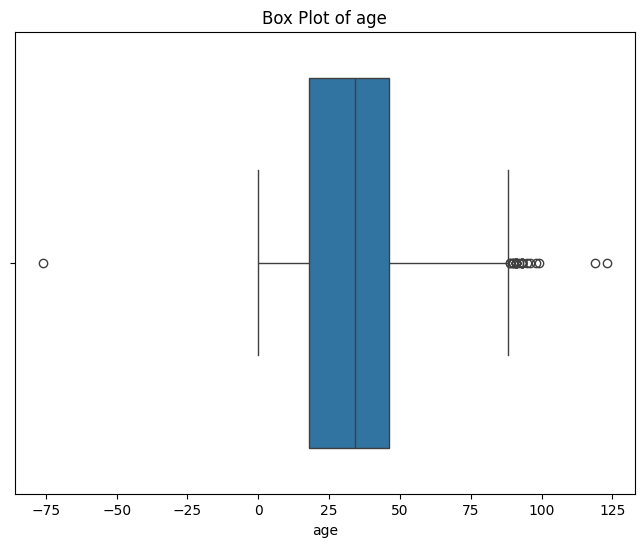

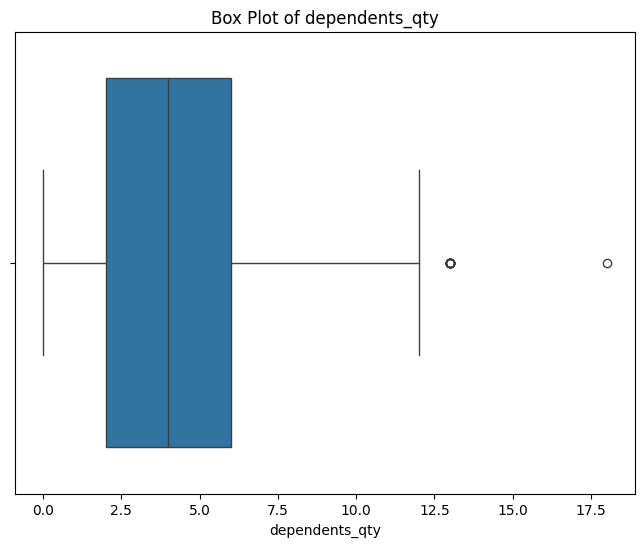

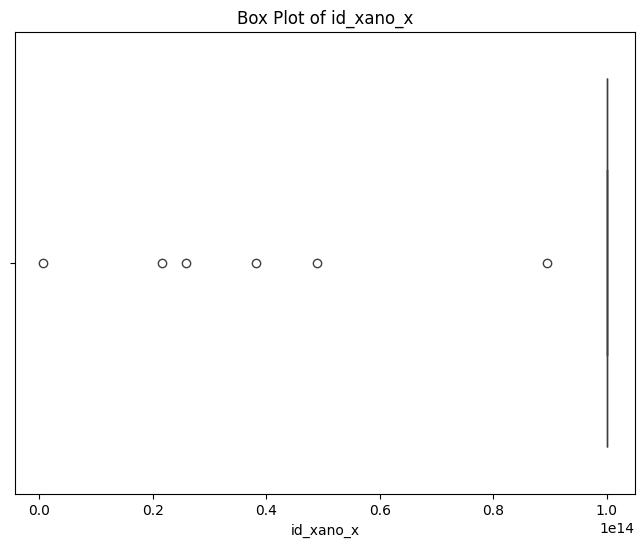

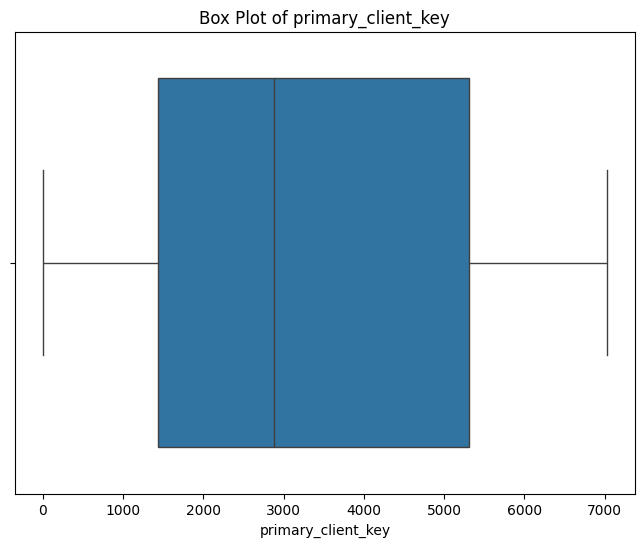

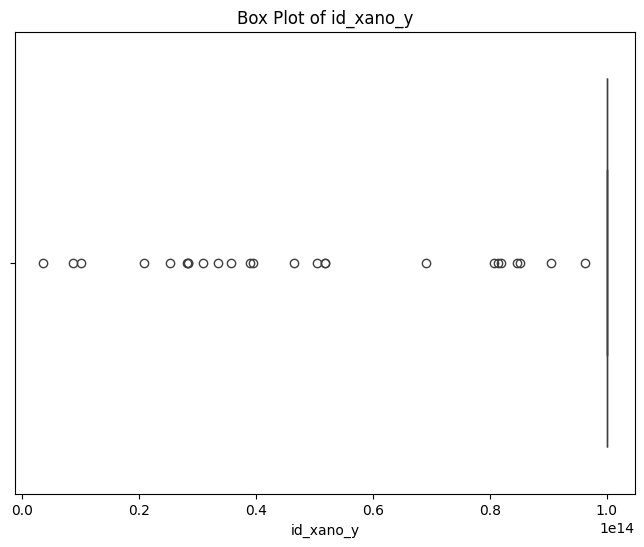

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for outlier detection
numeric_data = data.select_dtypes(include=['number'])
numeric_data = numeric_data[[col for col in numeric_data.columns if numeric_data[col].nunique() > 1]]

# Create a box plot for each numeric column
for column in numeric_data.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.boxplot(x=numeric_data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40940 entries, 0 to 40939
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ï»¿address                        22070 non-null  object 
 1   address_complement                2642 non-null   object 
 2   address_text                      19059 non-null  object 
 3   age                               40102 non-null  float64
 4   bio                               63 non-null     object 
 5   birthdates                        40090 non-null  object 
 6   client_status_more_info           264 non-null    object 
 7   communication_barrier             1 non-null      object 
 8   contact_frequency                 2640 non-null   object 
 9   date_reopened                     17463 non-null  object 
 10  dependents_qty                    35928 non-null  float64
 11  emergency_contact_name            0 non-null      float64
 12  emer

Dropping the columns which are not necessary for solving the problem

In [ ]:
# Dropping the unnecessary columns
columns_to_drop = ["address_complement", "sex", "hamper_confirmation_type", "unique id", "address_text", "confirmed", "date_reopened", "bio", "client_status_more_info",
                   "communication_barrier", "contact_frequency", "emergency_contact_name",
                   "emergency_phone_number", "english_proficiency_level", "external_id",
                   "id_xano_x", "latest_contact_method", "latest_language_code",
                   "organization_signature", "pets", "picture", "preferred_contact_method-old-old",
                   "preferred_contact_methods", "preferred_languages", "primary_birthdate",
                   "referral_organizations_allowed", "sex_new", "worker", "agent_collect",
                   "agent_collect_note", "appointment_contact", "appointment_participants",
                   "cal_color", "agent_related", "organization_x", "podio_created_on",
                   "Slug_x", "Creator_x", "appointment_participants", "appointment_type", "organization_y", "status_update", "client_list", "collect_token", "contact_method", "details", "g_event_id", "g_event_link", "id_xano_y", "marked_off", "meeting_link", "pickup_location", "qrcode", "quantity", "related_scheduler", "staff_invited", "timezone", "where", "Slug_y", "Creator_y", "primary_client_key", "primary_contact", "urgent_goal", "zz_address_txt", "datetime_to"]  # Removed empty strings

# Drop the columns
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
data["hamper_type"].value_counts()

,count
hamper_type,
1689345897790x875227980928652300,16470
1689345912064x246517613442701400,16


In [ ]:
data.shape

(40940, 18)

Changing the data types of numerical columns for making correlation matrix

In [ ]:
import pandas as pd
# Convert 'created_at' and 'updated_at' columns to datetime format
data['Creation Date_x'] = pd.to_datetime(data['Creation Date_x'], errors='coerce')
data['Modified Date_x'] = pd.to_datetime(data['Modified Date_x'], errors='coerce')
data['Creation Date_y'] = pd.to_datetime(data['Creation Date_y'], errors='coerce')
data['datetime_from'] = pd.to_datetime(data['datetime_from'], errors='coerce')
data['pickup_date'] = pd.to_datetime(data['pickup_date'], errors='coerce')
data['Modified Date_y'] = pd.to_datetime(data['Modified Date_y'], errors='coerce')

In [ ]:
data.head()

,ï»¿address,age,birthdates,dependents_qty,family,household,status,Creation Date_x,Modified Date_x,client_id,client_collected,collect_scheduled_date,datetime_from,hamper_type,pickup_date,title,Creation Date_y,Modified Date_y
0,NaN,NaN,NaN,1.0,1695130222566x921238755334009700,yes,Active,2022-09-23 19:07:00,2024-08-22 11:56:00,1663970867191x215057012520910850,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaT
1,NaN,NaN,NaN,1.0,1695130222165x975509409572786600,yes,Active,2022-09-23 19:09:00,2024-08-22 11:50:00,1663970977536x320239406776320000,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaT
2,"11834 Kingsway NW, Edmonton, AB T5G 3J5, Canada",NaN,NaN,1.0,1695130222573x705934639754824700,yes,Active,2022-11-01 15:27:00,2024-08-22 12:36:00,1667327243288x887165737992192000,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaT
3,"17916 78 St NW, Edmonton, AB T5Z 0G5, Canada",NaN,NaN,1.0,1695130222576x869045850202626800,yes,Active,2022-11-07 12:12:00,2024-08-22 11:58:00,1667833948363x769349711194751000,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaT
4,NaN,NaN,NaN,1.0,1695130222585x474362207170463900,yes,Active,2022-11-07 12:17:00,2024-08-22 12:04:00,1667834247644x935054501347328000,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaT


In [ ]:
# Drop rows with any missing values
data.dropna(inplace=True)

Checking the missing values in the data after handling missing values

In [ ]:
data.isnull().sum()

,0
ï»¿address,0
age,0
birthdates,0
dependents_qty,0
family,0
household,0
status,0
Creation Date_x,0
Modified Date_x,0
client_id,0


In [ ]:
data.shape

(6731, 18)

Feature engineering: Adding special events and also adding columns for special_event, days_of_week, weekend_or_weekday

In [ ]:
data.rename(columns={'ï»¿address': 'Address', 'dependents_qty':'Family_size', 'family':'Family_id', 'special_event':'Special_Event', 'day_of_week':'Day', 'age_group':'Age_group', 'status':'Status', 'pickup_date':'Pickup_date', 'title':'Title',}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6731 entries, 164 to 40918
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6731 non-null   object        
 1   age                     6731 non-null   float64       
 2   birthdates              6731 non-null   object        
 3   Family_size             6731 non-null   float64       
 4   Family_id               6731 non-null   object        
 5   household               6731 non-null   object        
 6   Status                  6731 non-null   object        
 7   Creation Date_x         6731 non-null   datetime64[ns]
 8   Modified Date_x         6731 non-null   datetime64[ns]
 9   client_id               6731 non-null   object        
 10  client_collected        6731 non-null   object        
 11  collect_scheduled_date  6731 non-null   object        
 12  datetime_from           6731 non-null   datetime64

In [ ]:
# Convert 'Pickup_date' back to datetime format
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'], errors='coerce')

# Extract the month and day from the 'Pickup_date' column
data['Month'] = data['Pickup_date'].dt.month
data['Day'] = data['Pickup_date'].dt.day
data['Year'] = data['Pickup_date'].dt.year

# Display the updated DataFrame
print(data[['Pickup_date', 'Month', 'Day', 'Year']].head())

            Pickup_date  Month  Day  Year
164 2023-09-07 17:37:00      9    7  2023
166 2023-11-07 15:59:00     11    7  2023
167 2023-11-16 17:04:00     11   16  2023
172 2024-04-17 15:25:00      4   17  2024
186 2023-09-12 17:39:00      9   12  2023


In [ ]:
# Importing necessary libraries
import nbformat

import pandas as pd

# Create a dictionary of special events for 2023 and 2024
Special_Event = {
    "1": "New Year's Day",
    "2": "Family Day",
    "3": "Ramadan",
    "4": "Eid al-Fitr",
    "5": "Laylat al-Qadr",
    "6": "Eid al-Adha",
    "7": "Islamic New Year",
    "8": "Hajj",
    "9": "Mawlid al-Nabi",
    "10": "Halloween",
    "11": "Remembrance Day",
    "12": "Christmas Day"
}

# Function to check if a date is a special event
def check_special_event(date):
    return Special_Event.get(str(date), "No Special Event")

# Apply function to label special events in the dataset
data["Special_Event"] = data["Month"].apply(check_special_event)

# Extract the day of the week
data["Day_of_week"] = data["Pickup_date"].dt.day_name()

# Classify as "Weekend" or "Weekday"
data["weekend_or_weekday"] = data["Day_of_week"].apply(lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday")

In [ ]:
import re

# Function to extract Canadian postal code using regex
def extract_postal_code(address):
   # Handle NoneType values by returning None
    if address is None:
        return None
    match = re.search(r'\b[A-Z]\d[A-Z] ?\d[A-Z]\d\b', str(address))  # Convert address to string
    return match.group() if match else None

# Apply the function to the Address column
data["Address"] = data["Address"].apply(extract_postal_code)

# Display the updated dataframe
data[['Address']].head()

,Address
164,T5C 1E8
166,T5C 1E8
167,T5C 1E8
172,T5C 1E8
186,T6W 0G6


In [ ]:
data["Address"].value_counts()

,count
Address,
T5C 0R7,106
T5C 3C9,84
T5H 3G1,67
T5X 2J3,66
T5H 2V7,63
...,...
T5B 4T7,1
T5P 3H5,1
T5H 1J4,1


In [ ]:
data.head(5)

,Address,age,birthdates,Family_size,Family_id,household,Status,Creation Date_x,Modified Date_x,client_id,...,Pickup_date,Title,Creation Date_y,Modified Date_y,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday
164,T5C 1E8,36.0,"Apr 13, 1987 03:00",6.0,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-09-07 17:37:00,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,9,7,2023,Mawlid al-Nabi,Thursday,Weekday
166,T5C 1E8,36.0,"Apr 13, 1987 03:00",6.0,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-11-07 15:59:00,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,11,7,2023,Remembrance Day,Tuesday,Weekday
167,T5C 1E8,36.0,"Apr 13, 1987 03:00",6.0,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-11-16 17:04:00,Food Hamper pickup,2023-11-16 17:03:00,2024-02-19 10:26:00,11,16,2023,Remembrance Day,Thursday,Weekday
172,T5C 1E8,36.0,"Apr 13, 1987 03:00",6.0,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2024-04-17 15:25:00,Food Hamper pickup,2023-11-16 17:03:00,2024-04-17 15:25:00,4,17,2024,Eid al-Fitr,Wednesday,Weekday
186,T6W 0G6,32.0,"Nov 7, 1990 04:00",5.0,1695130035707x891534858657611300,yes,Active,2023-09-12 16:36:00,2024-08-22 12:02:00,1694547419532x515953499649605600,...,2023-09-12 17:39:00,Sadek's Hamper,2023-09-12 17:33:00,2024-02-19 10:32:00,9,12,2023,Mawlid al-Nabi,Tuesday,Weekday


In [ ]:
import pandas as pd

# Convert the 'collect_scheduled_date' column to datetime format
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'], errors='coerce')

# Extract the hour from the datetime column
data['Pickup_date'] = data['Pickup_date'].dt.date

# Display the updated dataframe
data[['Pickup_date']].head()

,Pickup_date
164,2023-09-07
166,2023-11-07
167,2023-11-16
172,2024-04-17
186,2023-09-12


In [ ]:
import pandas as pd

# Convert the 'collect_scheduled_date' column to datetime format
data['collect_scheduled_date'] = pd.to_datetime(data['collect_scheduled_date'], errors='coerce')

# Extract the hour from the datetime column
data['collect_scheduled_date'] = data['collect_scheduled_date'].dt.date

# Display the updated dataframe
data[['collect_scheduled_date']].head()

,collect_scheduled_date
164,2023-09-07
166,2023-11-07
167,2023-11-16
172,2024-04-16
186,2023-09-12


Getting count of special events

In [ ]:
# Calculate the number of unique rows in the 'special_event' column
unique_events = data['Special_Event'].value_counts()

# Print the results
print("Number of unique special events:", len(unique_events))
print("\nUnique special event names and their frequencies:")
unique_events


Number of unique special events: 12

Unique special event names and their frequencies:


,count
Special_Event,
Eid al-Adha,969
Islamic New Year,825
Laylat al-Qadr,822
Ramadan,655
Eid al-Fitr,639
New Year's Day,614
Family Day,603
Hajj,535
Christmas Day,534


Getting count of weekday or weekend

In [ ]:
# Group by 'weekend_or_weekday' and get the unique values and their counts.
weekday_weekend_counts = data.groupby('weekend_or_weekday')['weekend_or_weekday'].count()

print("Unique values for weekday/weekend frequency:")
weekday_weekend_counts

Unique values for weekday/weekend frequency:


,weekend_or_weekday
weekend_or_weekday,
Weekday,6724
Weekend,7


Getting count of days of week for checking seasonality

In [ ]:
# Group by 'day_of_week' and count occurrences
day_counts = data['Day_of_week'].value_counts()

print("Occurrences of each day of the week:")
day_counts

Occurrences of each day of the week:


,count
Day_of_week,
Monday,1826
Thursday,1780
Tuesday,1586
Wednesday,1510
Friday,22
Saturday,7


Making visuals for getting useful insights from EDA

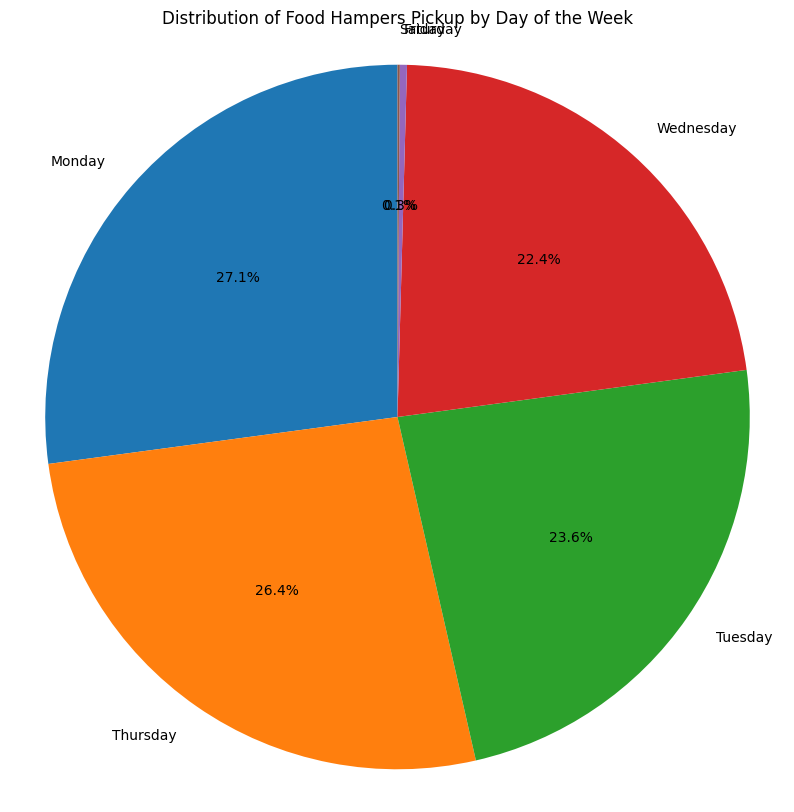

In [ ]:
import matplotlib.pyplot as plt

# Group by 'day_of_week' and count occurrences
day_counts = data['Day_of_week'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Food Hampers Pickup by Day of the Week')
plt.axis('equal')
plt.show()

In [ ]:
# Count the number of days with NaN values in the 'collect_scheduled_date' column
nan_days_count = data['collect_scheduled_date'].isna().sum()

print(f"Number of days with NaN values: {nan_days_count}")

Number of days with NaN values: 0


In [ ]:
data.head()

,Address,age,birthdates,Family_size,Family_id,household,Status,Creation Date_x,Modified Date_x,client_id,...,Pickup_date,Title,Creation Date_y,Modified Date_y,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday
164,T5C 1E8,36.0,"Apr 13, 1987 03:00",6.0,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-09-07,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,9,7,2023,Mawlid al-Nabi,Thursday,Weekday
166,T5C 1E8,36.0,"Apr 13, 1987 03:00",6.0,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-11-07,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,11,7,2023,Remembrance Day,Tuesday,Weekday
167,T5C 1E8,36.0,"Apr 13, 1987 03:00",6.0,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-11-16,Food Hamper pickup,2023-11-16 17:03:00,2024-02-19 10:26:00,11,16,2023,Remembrance Day,Thursday,Weekday
172,T5C 1E8,36.0,"Apr 13, 1987 03:00",6.0,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2024-04-17,Food Hamper pickup,2023-11-16 17:03:00,2024-04-17 15:25:00,4,17,2024,Eid al-Fitr,Wednesday,Weekday
186,T6W 0G6,32.0,"Nov 7, 1990 04:00",5.0,1695130035707x891534858657611300,yes,Active,2023-09-12 16:36:00,2024-08-22 12:02:00,1694547419532x515953499649605600,...,2023-09-12,Sadek's Hamper,2023-09-12 17:33:00,2024-02-19 10:32:00,9,12,2023,Mawlid al-Nabi,Tuesday,Weekday


Checking the names of columns

In [ ]:
data.columns

Index(['Address', 'age', 'birthdates', 'Family_size', 'Family_id', 'household',
       'Status', 'Creation Date_x', 'Modified Date_x', 'client_id',
       'client_collected', 'collect_scheduled_date', 'datetime_from',
       'hamper_type', 'Pickup_date', 'Title', 'Creation Date_y',
       'Modified Date_y', 'Month', 'Day', 'Year', 'Special_Event',
       'Day_of_week', 'weekend_or_weekday'],
      dtype='object')

Grouping the data by family for understanding the factor of Family Size

In [ ]:
# Group the data by the 'family' column and count occurrences
family_groups = data.groupby('Family_id').size().reset_index(name='count')

# Display the family groups and their counts
print("Grouped Families and their Counts:")
family_groups

Grouped Families and their Counts:


,Family_id,count
0,1695130035510x822223160822795600,4
1,1695130035652x949032949630633100,3
2,1695130035683x544517586045718600,8
3,1695130035702x825994886960317300,2
4,1695130035703x615158620333794800,4
...,...,...
946,1724091138365x907343329091649500,1
947,1724097941351x349582579805716500,1
948,1724182227926x833718853313495000,2
949,1724356305986x664173259117035500,2


Getting the top 20 families and their frequent visit

In [ ]:
# Get the top twenty families based on their counts
top_twenty_families = family_groups.nlargest(20, 'count')

# Display the top twenty families
print("Top twenty families:")
top_twenty_families

Top twenty families:


,Family_id,count
10,1695666802742x983394029591330800,13
11,1695668938193x780717682621153300,13
23,1698180831854x874530201353322500,13
24,1698253042137x394109952468975600,13
37,1699830459055x266551879861975040,13
86,1699830460702x212636085495678600,13
97,1699830461006x307899212448072400,13
445,1699830481579x607094416074706400,13
490,1699830485348x938302990278728600,13
622,1699830494950x780354565933242900,13


In [ ]:
data.dtypes

,0
Address,object
age,float64
birthdates,object
Family_size,float64
Family_id,object
household,object
Status,object
Creation Date_x,datetime64[ns]
Modified Date_x,datetime64[ns]
client_id,object


Converting the data types

In [ ]:
# Convert the 'pickup_date' column to integer type
data['age'] = data['age'].astype(int)
data['Family_size'] = data['Family_size'].astype(int)

In [ ]:
data.dtypes

,0
Address,object
age,int64
birthdates,object
Family_size,int64
Family_id,object
household,object
Status,object
Creation Date_x,datetime64[ns]
Modified Date_x,datetime64[ns]
client_id,object


In [ ]:
data.shape

(6731, 24)

Checking the status of families for Food Hamper Collection

In [ ]:
data["Status"].value_counts()

,count
Status,
Active,6395
Closed,226
Pending,91
Outreach,10
Flagged,9


In [ ]:
data.head()

,Address,age,birthdates,Family_size,Family_id,household,Status,Creation Date_x,Modified Date_x,client_id,...,Pickup_date,Title,Creation Date_y,Modified Date_y,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday
164,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-09-07,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,9,7,2023,Mawlid al-Nabi,Thursday,Weekday
166,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-11-07,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,11,7,2023,Remembrance Day,Tuesday,Weekday
167,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-11-16,Food Hamper pickup,2023-11-16 17:03:00,2024-02-19 10:26:00,11,16,2023,Remembrance Day,Thursday,Weekday
172,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2024-04-17,Food Hamper pickup,2023-11-16 17:03:00,2024-04-17 15:25:00,4,17,2024,Eid al-Fitr,Wednesday,Weekday
186,T6W 0G6,32,"Nov 7, 1990 04:00",5,1695130035707x891534858657611300,yes,Active,2023-09-12 16:36:00,2024-08-22 12:02:00,1694547419532x515953499649605600,...,2023-09-12,Sadek's Hamper,2023-09-12 17:33:00,2024-02-19 10:32:00,9,12,2023,Mawlid al-Nabi,Tuesday,Weekday


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6731 entries, 164 to 40918
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6510 non-null   object        
 1   age                     6731 non-null   int64         
 2   birthdates              6731 non-null   object        
 3   Family_size             6731 non-null   int64         
 4   Family_id               6731 non-null   object        
 5   household               6731 non-null   object        
 6   Status                  6731 non-null   object        
 7   Creation Date_x         6731 non-null   datetime64[ns]
 8   Modified Date_x         6731 non-null   datetime64[ns]
 9   client_id               6731 non-null   object        
 10  client_collected        6731 non-null   object        
 11  collect_scheduled_date  6731 non-null   object        
 12  datetime_from           6731 non-null   datetime64

Grouping the families and getting their counts

Displaying the visuals for understanding the relation between family size and food distribution

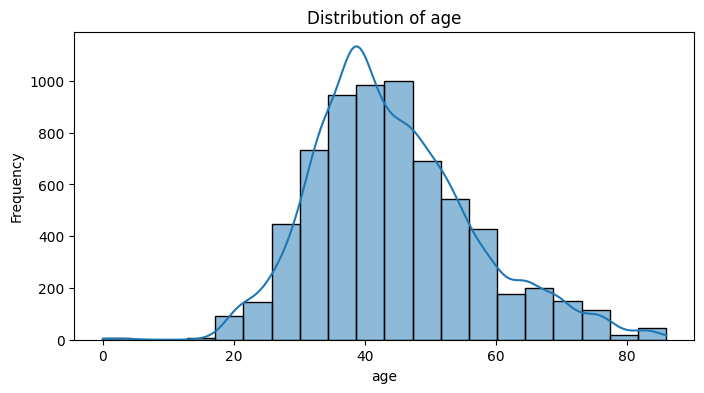

In [ ]:
numerical_columns = ['age']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

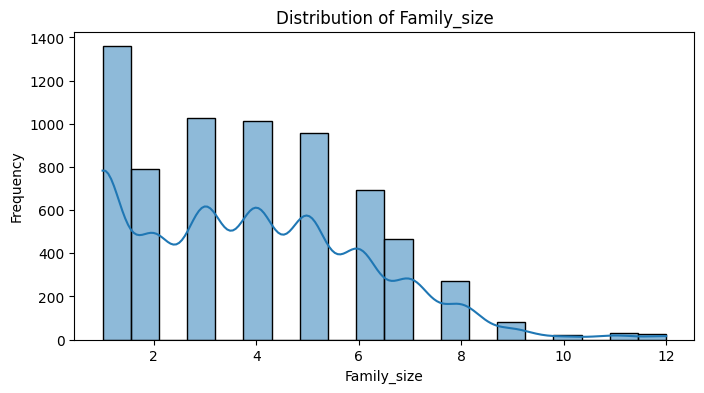

In [ ]:
numerical_columns = ['Family_size']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#  Replace 'categorical_column' with your actual categorical column name
if 'categorical_column' in data.columns:
     sns.countplot(x='categorical_column', data=data)
     plt.title('Countplot of Categorical Column')
     plt.show()

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


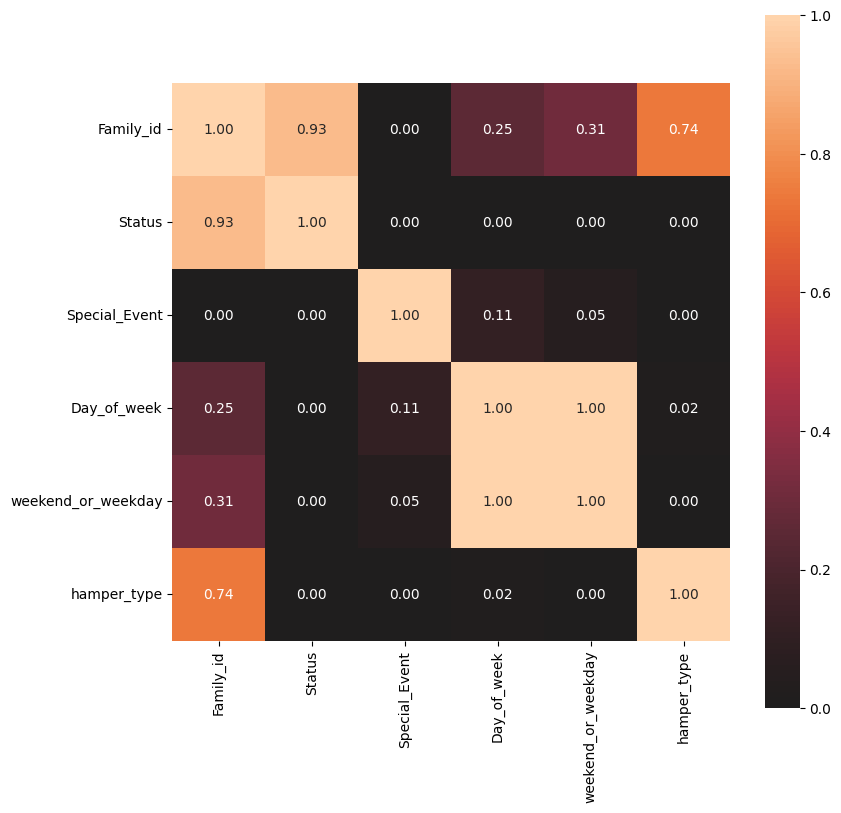

In [ ]:
# make a correlation heatmap between in the categorical column

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in your code.

# List of categorical columns you want to analyze (replace with your actual column names)
categorical_cols = ['Family_id', 'Status', 'Special_Event', 'Day_of_week', 'weekend_or_weekday', 'hamper_type']

# Create a correlation heatmap for categorical features using Cramer's V
# Install the 'dython' library if not already installed.
!pip install dython

from dython.nominal import associations

categorical_data = data[categorical_cols]
# The 'theil_u' argument is no longer supported, remove it.
corr_matrix = associations(categorical_data, nominal_columns=categorical_cols, plot=False)

# Access the 'corr' key from the dictionary to get the correlation matrix
correlation_matrix = corr_matrix['corr']  # Extract the correlation matrix


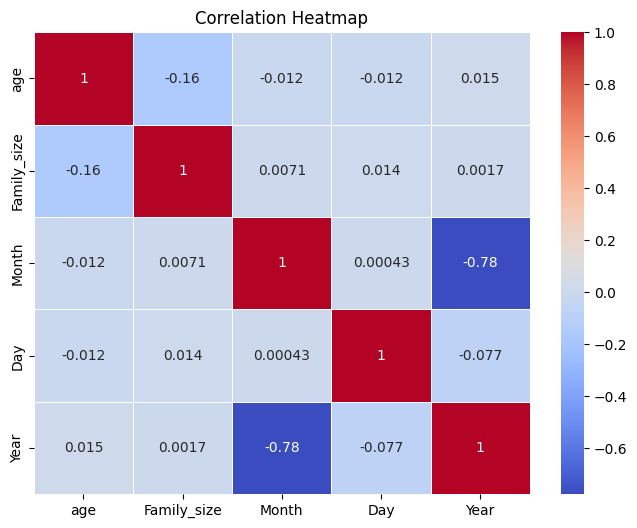

In [ ]:
# # Correlation heatmap for numerical features
correlation_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

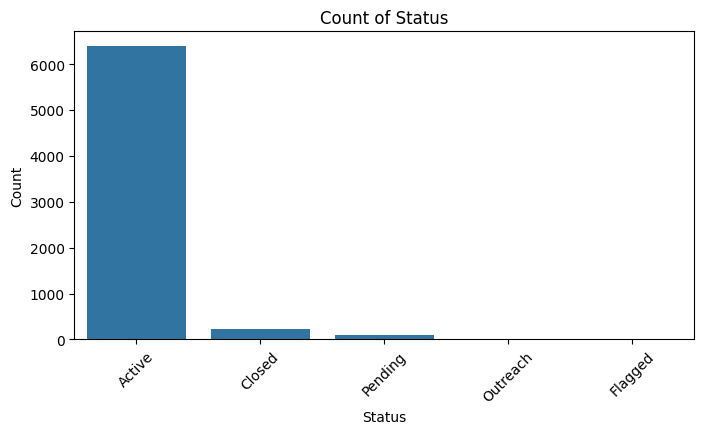

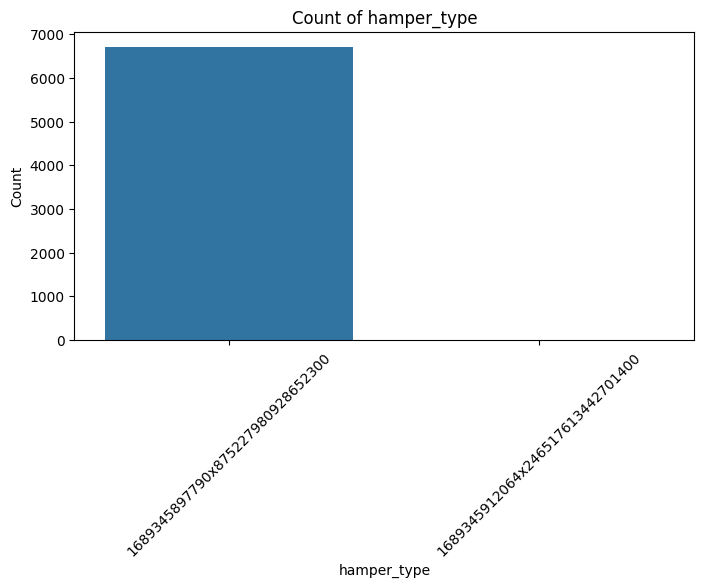

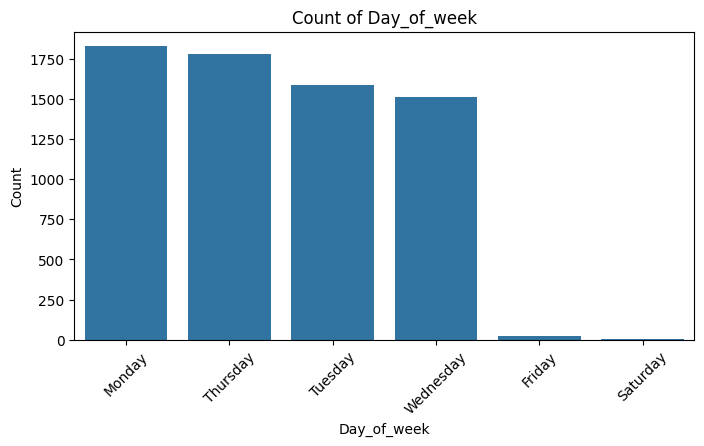

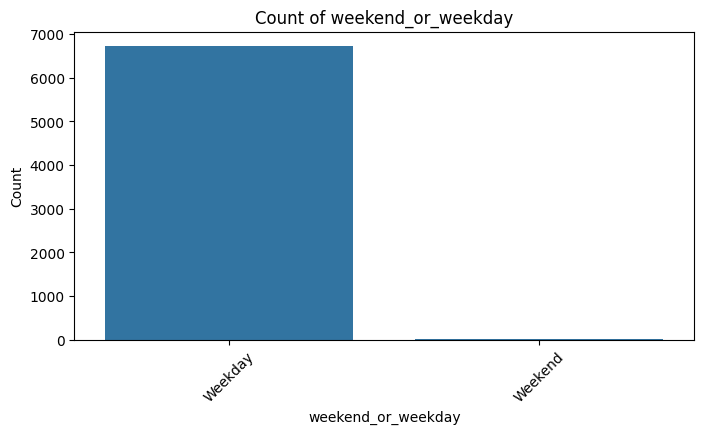

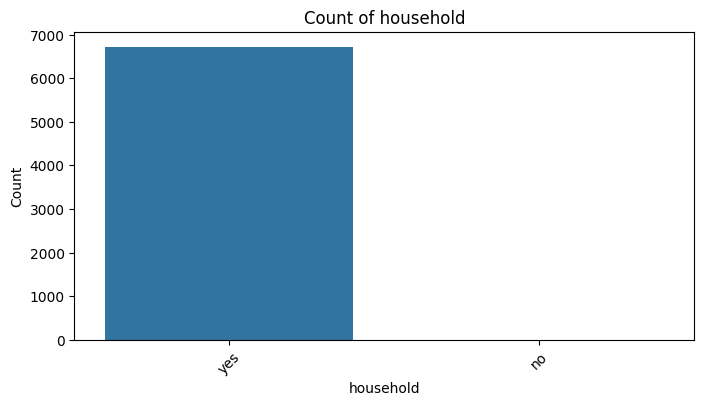

In [ ]:
# Count of categorical variables
categorical_columns = ['Status','hamper_type','Day_of_week', 'weekend_or_weekday', 'household']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Displaying Line Graph for comapring the

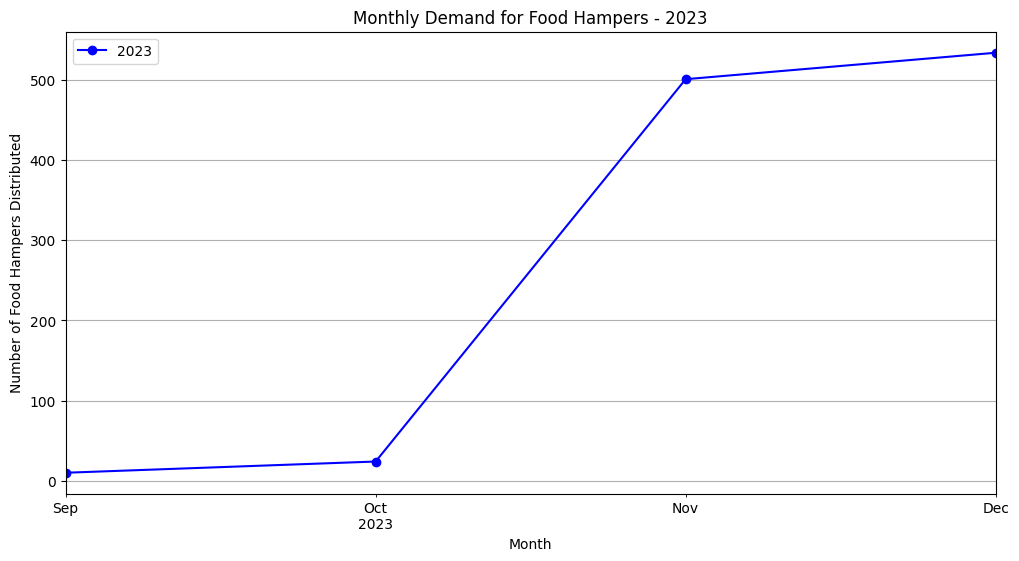

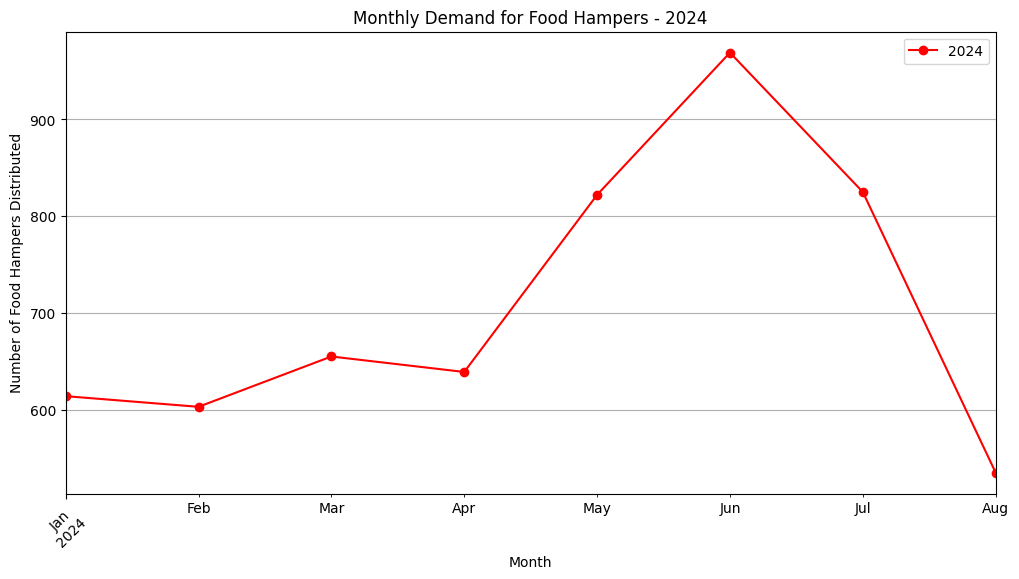

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'Pickup_date' is in datetime format
data["Pickup_date"] = pd.to_datetime(data["Pickup_date"])

# Extract year and month for aggregation
data["Year"] = data["Pickup_date"].dt.year
data["Year-Month"] = data["Pickup_date"].dt.to_period("M")

# Separate data for 2023 and 2024
monthly_demand_2023 = data[data["Year"] == 2023].groupby("Year-Month").size()
monthly_demand_2024 = data[data["Year"] == 2024].groupby("Year-Month").size()

# Plot demand for 2023
plt.figure(figsize=(12, 6))
monthly_demand_2023.plot(kind="line", marker="o", linestyle="-", color="blue", label="2023")
plt.xlabel("Month")
plt.ylabel("Number of Food Hampers Distributed")
plt.title("Monthly Demand for Food Hampers - 2023")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot demand for 2024
plt.figure(figsize=(12, 6))
monthly_demand_2024.plot(kind="line", marker="o", linestyle="-", color="red", label="2024")
plt.xlabel("Month")
plt.ylabel("Number of Food Hampers Distributed")
plt.title("Monthly Demand for Food Hampers - 2024")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6731 entries, 164 to 40918
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6510 non-null   object        
 1   age                     6731 non-null   int64         
 2   birthdates              6731 non-null   object        
 3   Family_size             6731 non-null   int64         
 4   Family_id               6731 non-null   object        
 5   household               6731 non-null   object        
 6   Status                  6731 non-null   object        
 7   Creation Date_x         6731 non-null   datetime64[ns]
 8   Modified Date_x         6731 non-null   datetime64[ns]
 9   client_id               6731 non-null   object        
 10  client_collected        6731 non-null   object        
 11  collect_scheduled_date  6731 non-null   object        
 12  datetime_from           6731 non-null   datetime64

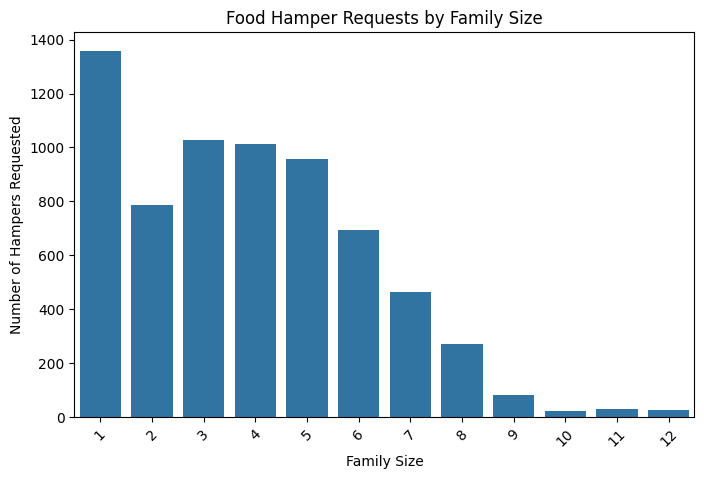

In [ ]:
# Group by family size and count food hamper requests
family_demand = data.groupby("Family_size")["Pickup_date"].count().reset_index()
family_demand.columns = ["Family_size", "num_hampers"]

# Plot the relationship
plt.figure(figsize=(8,5))
sns.barplot(x="Family_size", y="num_hampers", data=family_demand)
plt.title("Food Hamper Requests by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Number of Hampers Requested")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check if 'Age' column exists
if 'age' in data.columns:
    # Filter the DataFrame
    data = data[(data['age'] >= 18) & (data['age'] <= 65)]
    print(data.head()) # Display first few rows of filtered data
else:
    print("The 'Age' column does not exist in the DataFrame.")

     Address  age          birthdates  Family_size  \
164  T5C 1E8   36  Apr 13, 1987 03:00            6   
166  T5C 1E8   36  Apr 13, 1987 03:00            6   
167  T5C 1E8   36  Apr 13, 1987 03:00            6   
172  T5C 1E8   36  Apr 13, 1987 03:00            6   
186  T6W 0G6   32   Nov 7, 1990 04:00            5   

                            Family_id household  Status     Creation Date_x  \
164  1695130035510x822223160822795600       yes  Active 2023-09-07 16:37:00   
166  1695130035510x822223160822795600       yes  Active 2023-09-07 16:37:00   
167  1695130035510x822223160822795600       yes  Active 2023-09-07 16:37:00   
172  1695130035510x822223160822795600       yes  Active 2023-09-07 16:37:00   
186  1695130035707x891534858657611300       yes  Active 2023-09-12 16:36:00   

        Modified Date_x                         client_id  ...  \
164 2024-08-22 12:31:00  1694115474357x134699341188431870  ...   
166 2024-08-22 12:31:00  1694115474357x134699341188431870  ...   
16

In [ ]:
data.head()

,Address,age,birthdates,Family_size,Family_id,household,Status,Creation Date_x,Modified Date_x,client_id,...,Title,Creation Date_y,Modified Date_y,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,Year-Month
164,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,9,7,2023,Mawlid al-Nabi,Thursday,Weekday,2023-09
166,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,11,7,2023,Remembrance Day,Tuesday,Weekday,2023-11
167,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,Food Hamper pickup,2023-11-16 17:03:00,2024-02-19 10:26:00,11,16,2023,Remembrance Day,Thursday,Weekday,2023-11
172,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,Food Hamper pickup,2023-11-16 17:03:00,2024-04-17 15:25:00,4,17,2024,Eid al-Fitr,Wednesday,Weekday,2024-04
186,T6W 0G6,32,"Nov 7, 1990 04:00",5,1695130035707x891534858657611300,yes,Active,2023-09-12 16:36:00,2024-08-22 12:02:00,1694547419532x515953499649605600,...,Sadek's Hamper,2023-09-12 17:33:00,2024-02-19 10:32:00,9,12,2023,Mawlid al-Nabi,Tuesday,Weekday,2023-09


In [ ]:
import pandas as pd
# Create bins and labels for age ranges
bins = [0, 20, 40, 60, 80]
labels = ['0-20', '20-40', '40-60', '60-80']

# Add the new 'age_group' column to the DataFrame
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify the new column
print(data.head())


     Address  age          birthdates  Family_size  \
164  T5C 1E8   36  Apr 13, 1987 03:00            6   
166  T5C 1E8   36  Apr 13, 1987 03:00            6   
167  T5C 1E8   36  Apr 13, 1987 03:00            6   
172  T5C 1E8   36  Apr 13, 1987 03:00            6   
186  T6W 0G6   32   Nov 7, 1990 04:00            5   

                            Family_id household  Status     Creation Date_x  \
164  1695130035510x822223160822795600       yes  Active 2023-09-07 16:37:00   
166  1695130035510x822223160822795600       yes  Active 2023-09-07 16:37:00   
167  1695130035510x822223160822795600       yes  Active 2023-09-07 16:37:00   
172  1695130035510x822223160822795600       yes  Active 2023-09-07 16:37:00   
186  1695130035707x891534858657611300       yes  Active 2023-09-12 16:36:00   

        Modified Date_x                         client_id  ...  \
164 2024-08-22 12:31:00  1694115474357x134699341188431870  ...   
166 2024-08-22 12:31:00  1694115474357x134699341188431870  ...   
16

In [ ]:
data.head()

,Address,age,birthdates,Family_size,Family_id,household,Status,Creation Date_x,Modified Date_x,client_id,...,Creation Date_y,Modified Date_y,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,Year-Month,age_group
164,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-09-07 17:36:00,2024-02-19 10:32:00,9,7,2023,Mawlid al-Nabi,Thursday,Weekday,2023-09,20-40
166,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-09-07 17:36:00,2024-02-19 10:32:00,11,7,2023,Remembrance Day,Tuesday,Weekday,2023-11,20-40
167,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-11-16 17:03:00,2024-02-19 10:26:00,11,16,2023,Remembrance Day,Thursday,Weekday,2023-11,20-40
172,T5C 1E8,36,"Apr 13, 1987 03:00",6,1695130035510x822223160822795600,yes,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,1694115474357x134699341188431870,...,2023-11-16 17:03:00,2024-04-17 15:25:00,4,17,2024,Eid al-Fitr,Wednesday,Weekday,2024-04,20-40
186,T6W 0G6,32,"Nov 7, 1990 04:00",5,1695130035707x891534858657611300,yes,Active,2023-09-12 16:36:00,2024-08-22 12:02:00,1694547419532x515953499649605600,...,2023-09-12 17:33:00,2024-02-19 10:32:00,9,12,2023,Mawlid al-Nabi,Tuesday,Weekday,2023-09,20-40


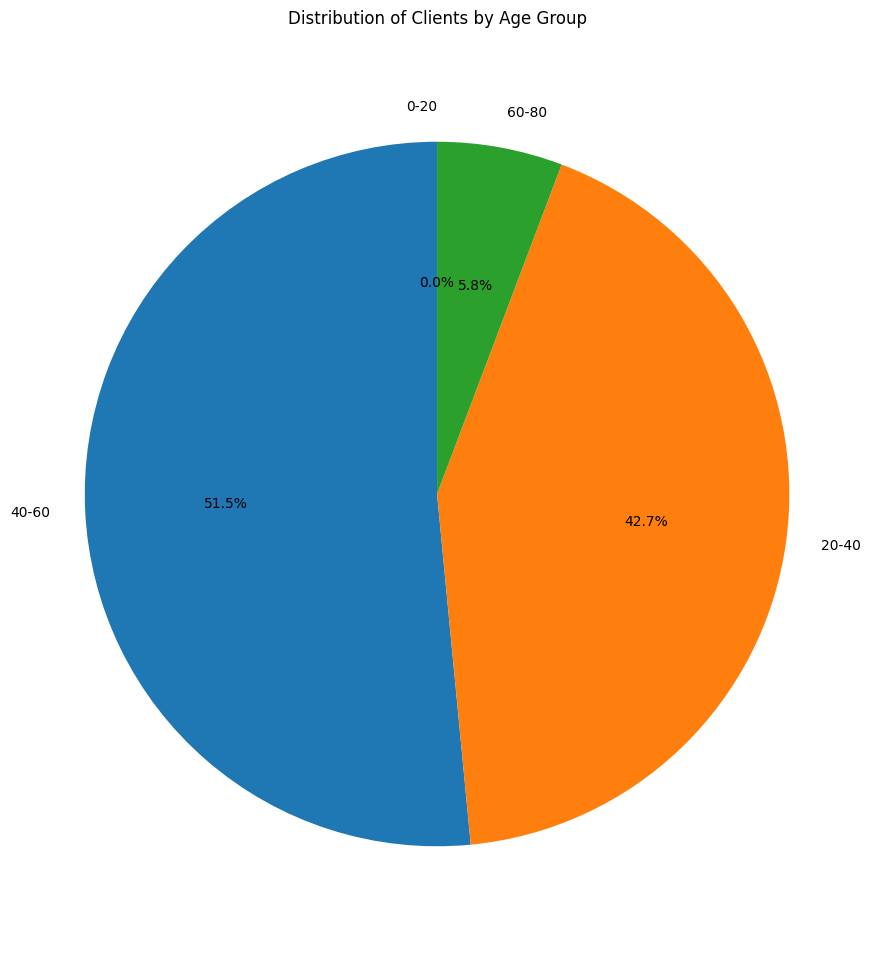

In [ ]:
import matplotlib.pyplot as plt


# Count occurrences of each age group
age_group_counts = data['age_group'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 12))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clients by Age Group')
plt.axis('equal')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6292 entries, 164 to 40918
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6071 non-null   object        
 1   age                     6292 non-null   int64         
 2   birthdates              6292 non-null   object        
 3   Family_size             6292 non-null   int64         
 4   Family_id               6292 non-null   object        
 5   household               6292 non-null   object        
 6   Status                  6292 non-null   object        
 7   Creation Date_x         6292 non-null   datetime64[ns]
 8   Modified Date_x         6292 non-null   datetime64[ns]
 9   client_id               6292 non-null   object        
 10  client_collected        6292 non-null   object        
 11  collect_scheduled_date  6292 non-null   object        
 12  datetime_from           6292 non-null   datetime64

In [ ]:
data.drop(columns=['age', 'birthdates', 'household', 'Creation Date_x', 'Modified Date_x', 'Creation Date_y', 'Modified Date_y', 'datetime_from', 'household', 'hamper_type', 'Year-Month', 'client_collected'], inplace=True)

In [ ]:
data.head()

,Address,Family_size,Family_id,Status,client_id,collect_scheduled_date,Pickup_date,Title,Month,Day,Year,Special_Event,Day_of_week,weekend_or_weekday,age_group
164,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-09-07,2023-09-07,Abdulhalim's Hamper,9,7,2023,Mawlid al-Nabi,Thursday,Weekday,20-40
166,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-07,2023-11-07,Abdulhalim's Hamper,11,7,2023,Remembrance Day,Tuesday,Weekday,20-40
167,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2023-11-16,2023-11-16,Food Hamper pickup,11,16,2023,Remembrance Day,Thursday,Weekday,20-40
172,T5C 1E8,6,1695130035510x822223160822795600,Active,1694115474357x134699341188431870,2024-04-16,2024-04-17,Food Hamper pickup,4,17,2024,Eid al-Fitr,Wednesday,Weekday,20-40
186,T6W 0G6,5,1695130035707x891534858657611300,Active,1694547419532x515953499649605600,2023-09-12,2023-09-12,Sadek's Hamper,9,12,2023,Mawlid al-Nabi,Tuesday,Weekday,20-40


In [ ]:
# Drop rows with any missing values
data.dropna(inplace=True)

# Checking the missing values in the data after handling missing values
print(data.isnull().sum())
data.shape

Address                   0
Family_size               0
Family_id                 0
Status                    0
client_id                 0
collect_scheduled_date    0
Pickup_date               0
Title                     0
Month                     0
Day                       0
Year                      0
Special_Event             0
Day_of_week               0
weekend_or_weekday        0
age_group                 0
dtype: int64


(6071, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6071 entries, 164 to 40918
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 6071 non-null   object        
 1   Family_size             6071 non-null   int64         
 2   Family_id               6071 non-null   object        
 3   Status                  6071 non-null   object        
 4   client_id               6071 non-null   object        
 5   collect_scheduled_date  6071 non-null   object        
 6   Pickup_date             6071 non-null   datetime64[ns]
 7   Title                   6071 non-null   object        
 8   Month                   6071 non-null   int32         
 9   Day                     6071 non-null   int32         
 10  Year                    6071 non-null   int32         
 11  Special_Event           6071 non-null   object        
 12  Day_of_week             6071 non-null   object    

In [ ]:
data.to_csv('Islamic_Food_Drive_cleaned_data.csv', index=False)  # Save DataFrame to CSV

from google.colab import files
files.download('Islamic_Food_Drive_cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pandas-profiling[notebook,html]

  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
  Attempting uninstall: visions
    Found existing installation: visions 0.8.1
    Uninstalling visions-0.8.1:
      Successfully uninstalled visions-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [ ]:
!pip install ydata_profiling

  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data, title="Islamic Food Drive", html={'style': {'full_width': True}}, sort=None)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:01<00:00, 12.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]